<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/autoencoders_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount to Google Drive
%cd /content/drive/My Drive/Colab Notebooks/autoencoders

/content/drive/My Drive/Colab Notebooks/autoencoders


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Import dataset
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


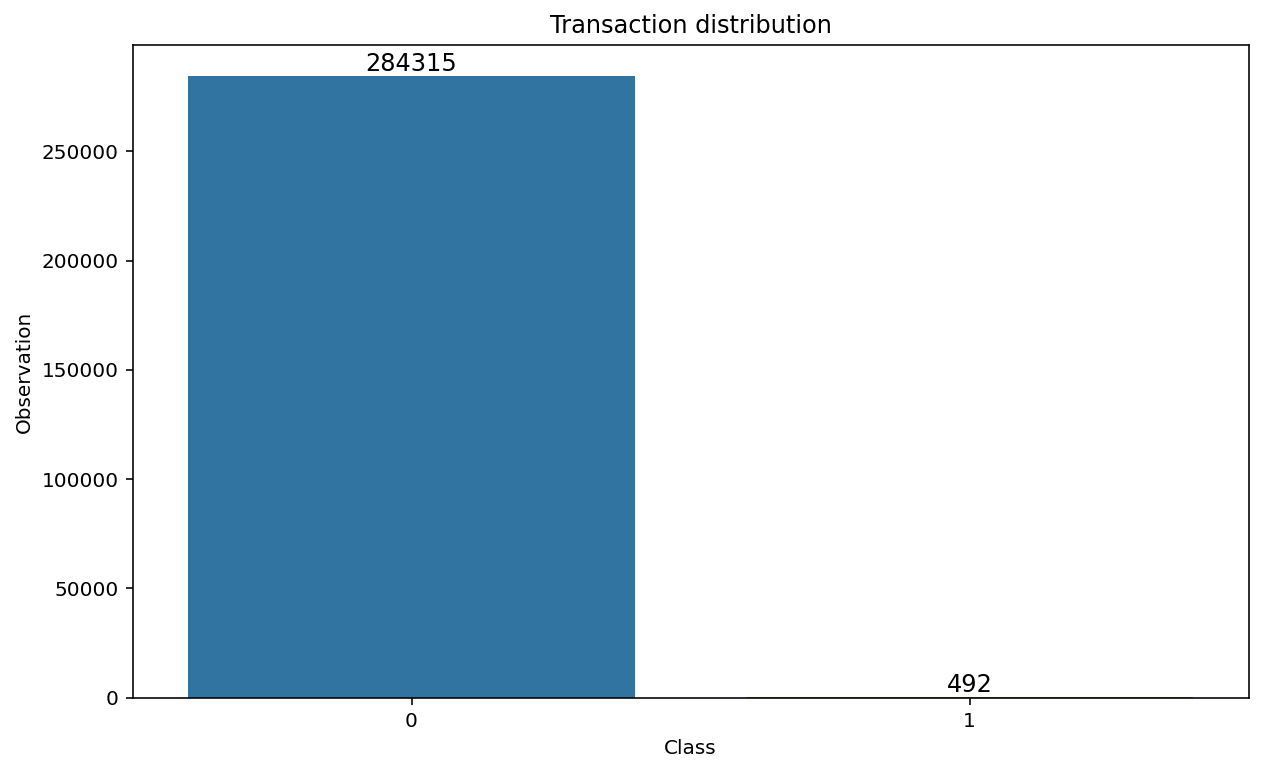

In [ ]:
#Data visualization
plt.figure(figsize = (10, 6))
sns.countplot(df['Class'])
plt.title('Transaction distribution')
plt.xlabel('Class')
plt.ylabel('Observation')
for v in [0, 1]:
  plt.text(v, (df['Class'] == v).sum(), str((df['Class'] == v).sum()),
           horizontalalignment = 'center',
           verticalalignment = 'bottom',
           fontsize = 12)

In [ ]:
#Data preparation
df = df.drop(['Time'], axis = 1) #Don't need to use 'Time' feature

#Scale 'Amount' to remove the mean
scale = StandardScaler()
df['Amount'] = scale.fit_transform(df['Amount'].values.reshape(-1, 1))

#Split data for training and testing
train, test = train_test_split(df, test_size = 0.2, random_state = 7)
x_train = train[train['Class'] == 0]
x_train = x_train.drop(['Class'], axis = 1)
x_test = test.iloc[:, :-1] #Don't need 'Class'
y_test = test['Class'] #Need only 'Class' for validation

#Covert to values
x_train = x_train.values
x_test = x_test.values
y_test = y_test.values
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(227453, 29)
(56962, 29)
(56962,)


In [ ]:
#Import libraries
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras import regularizers

In [ ]:
#Autoencoder model
lr_rate = 1e-3
epoch = 200
batch_size = 128

def autoencoder_model(x):
  input_layer = Input(shape = (x.shape[1], ))
  encoder = Dense(x.shape[1] // 2, activation = 'tanh', activity_regularizer = regularizers.l1(lr_rate))(input_layer)
  encoder = Dense(x.shape[1] // 4, activation = 'relu')(encoder)
  decoder = Dense(x.shape[1] // 4, activation = 'relu')(encoder)
  decoder = Dense(x.shape[1] // 2, activation = 'tanh')(decoder)
  output_layer = Dense(x.shape[1], activation = 'linear')(decoder)
  model = Model(inputs = input_layer, outputs = output_layer)
  return model

In [ ]:
#Model compile
model = autoencoder_model(x_train)
model.compile(metrics = ['accuracy'], loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_5 (Dense)              (None, 29)                435       
Total params: 1,128
Trainable params: 1,128
Non-trainable params: 0
_________________________________________________________

In [ ]:
#Training model
history = model.fit(x_train, x_train, epochs = epoch,
                    batch_size = batch_size, shuffle = True,
                    validation_data = (x_test, x_test), verbose = 1).history

Train on 227453 samples, validate on 56962 samples
Epoch 1/200
227453/227453 [==============================] - 8s 35us/step - loss: 0.9192 - accuracy: 0.4030 - val_loss: 0.8162 - val_accuracy: 0.4520
Epoch 2/200
227453/227453 [==============================] - 6s 27us/step - loss: 0.6468 - accuracy: 0.5256 - val_loss: 0.6987 - val_accuracy: 0.5734
Epoch 3/200
227453/227453 [==============================] - 6s 27us/step - loss: 0.5712 - accuracy: 0.5898 - val_loss: 0.6472 - val_accuracy: 0.6035
Epoch 4/200
227453/227453 [==============================] - 6s 28us/step - loss: 0.5392 - accuracy: 0.6080 - val_loss: 0.6204 - val_accuracy: 0.6189
Epoch 5/200
227453/227453 [==============================] - 6s 28us/step - loss: 0.5137 - accuracy: 0.6163 - val_loss: 0.5961 - val_accuracy: 0.6154
Epoch 6/200
227453/227453 [==============================] - 7s 29us/step - loss: 0.4889 - accuracy: 0.6123 - val_loss: 0.5856 - val_accuracy: 0.6159
Epoch 7/200
227453/227453 [======================

In [ ]:
#Save model
model.save('fraud_detection.model')

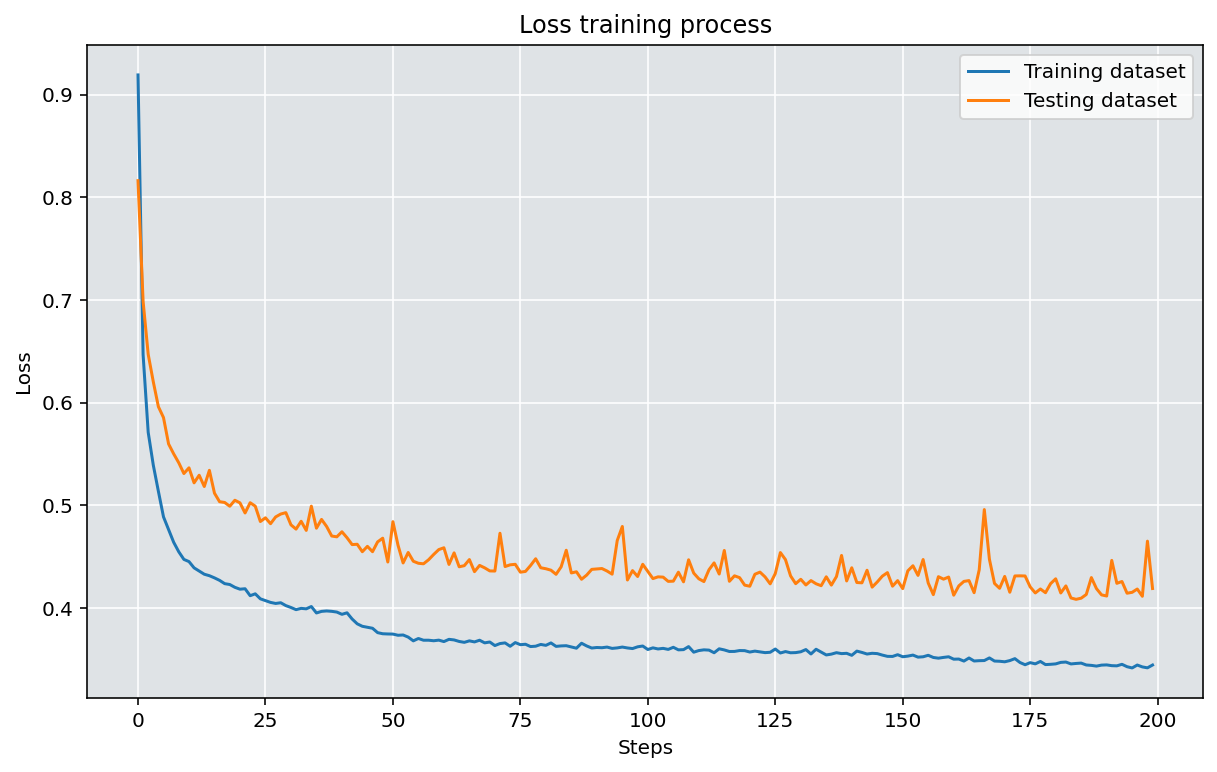

In [ ]:
#Model Evaluate
plt.figure(figsize = (10, 6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss training process')
plt.ylabel('Loss')
plt.xlabel('Steps')
plt.legend(['Training dataset', 'Testing dataset'], loc = 'upper right')

In [ ]:
#Reconstruction error
predicts = model.predict(x_test)
re_error = ((x_test - predicts) ** 2).mean(axis = 1)
re_error = np.stack((y_test, re_error), axis = -1)
print(re_error)

[[0.         0.12230231]
 [0.         0.25220871]
 [0.         0.39347645]
 ...
 [0.         0.25363676]
 [0.         0.22891202]
 [0.         0.2780398 ]]


Text(0.5, 0, 'False positive')

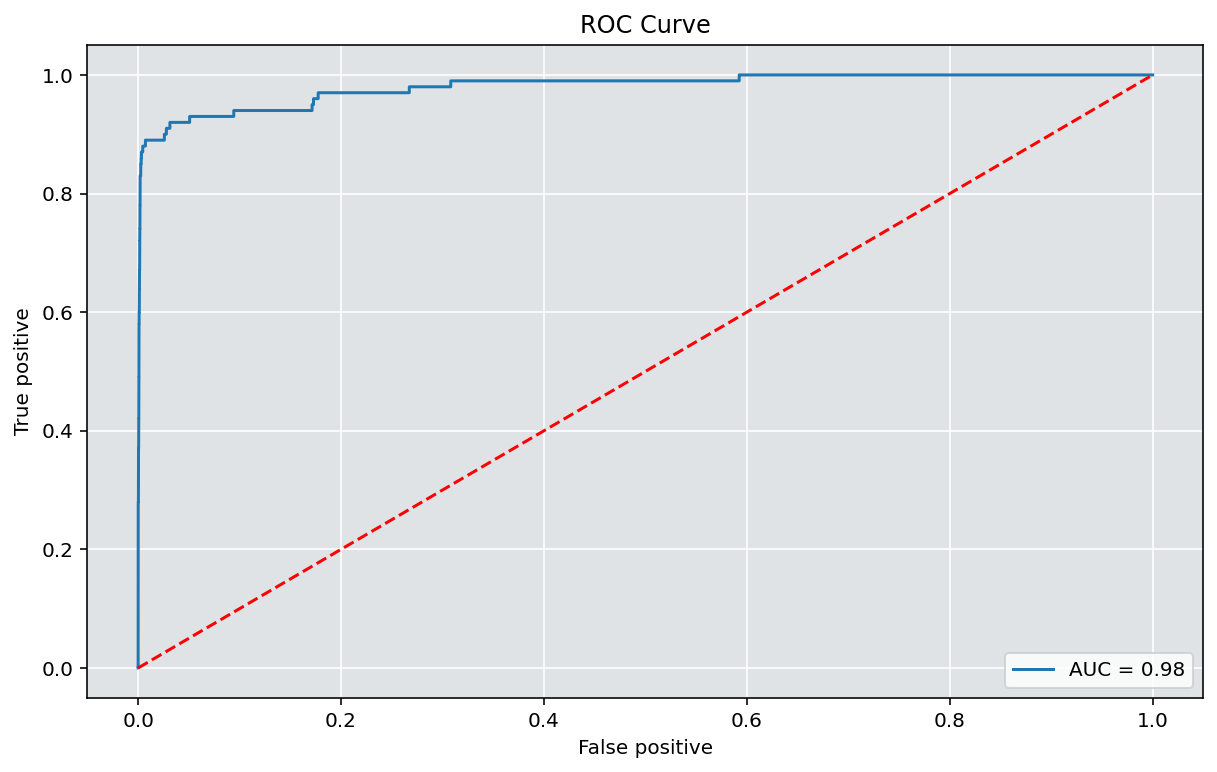

In [ ]:
#ROC Curve
from sklearn.metrics import confusion_matrix, auc, roc_curve

fpr, tpr, thresholds = roc_curve(re_error[:, 0], re_error[:, 1])
roc_auc = auc(fpr, tpr)

#Plotting ROC Curve
plt.figure(figsize = (10, 6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(fpr, tpr, label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.ylabel('True positive')
plt.xlabel('False positive')

Text(0.5, 51.0, 'Predicted class')

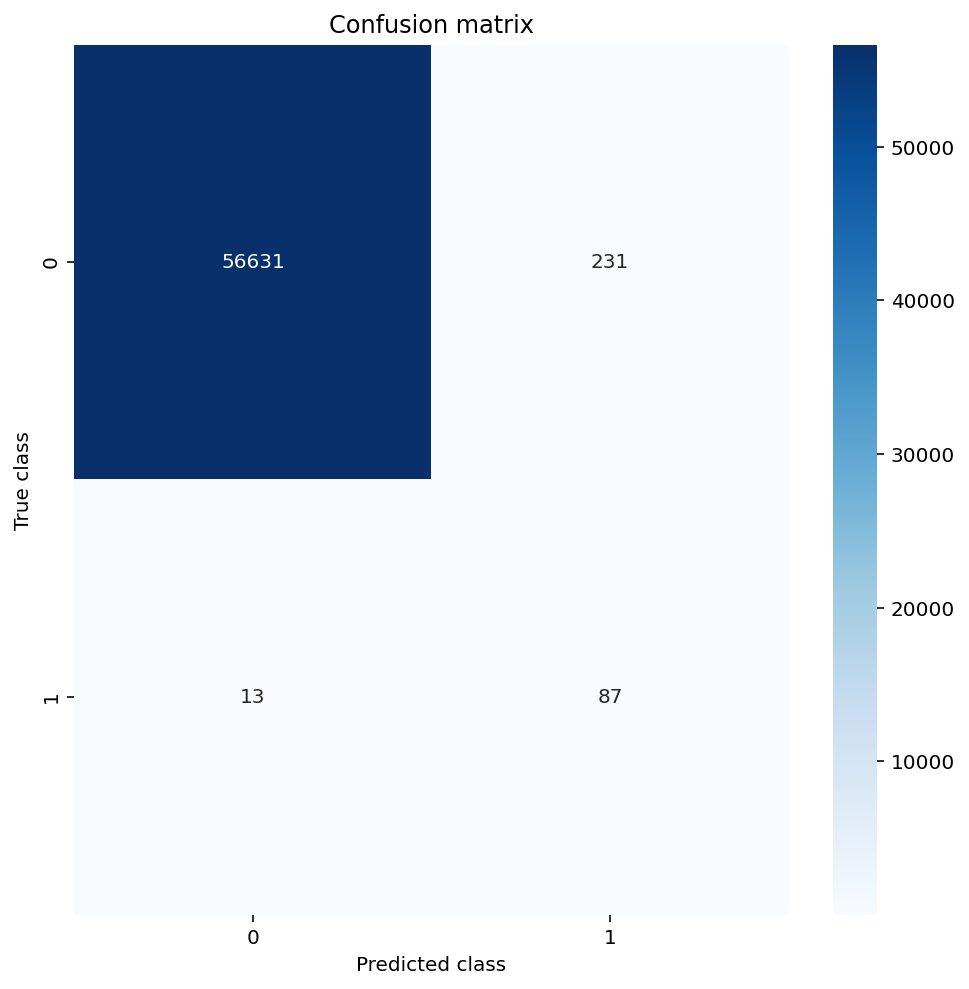

In [ ]:
#Confusion matrix
thres = 2.5
y_predict = [1 if e > thres else 0 for e in re_error[:, 1]]
matrix = confusion_matrix(re_error[:, 0], y_predict)

#Plotting confusion matrix
plt.figure(figsize = (8, 8))
sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Blues');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 0, 'Observation')

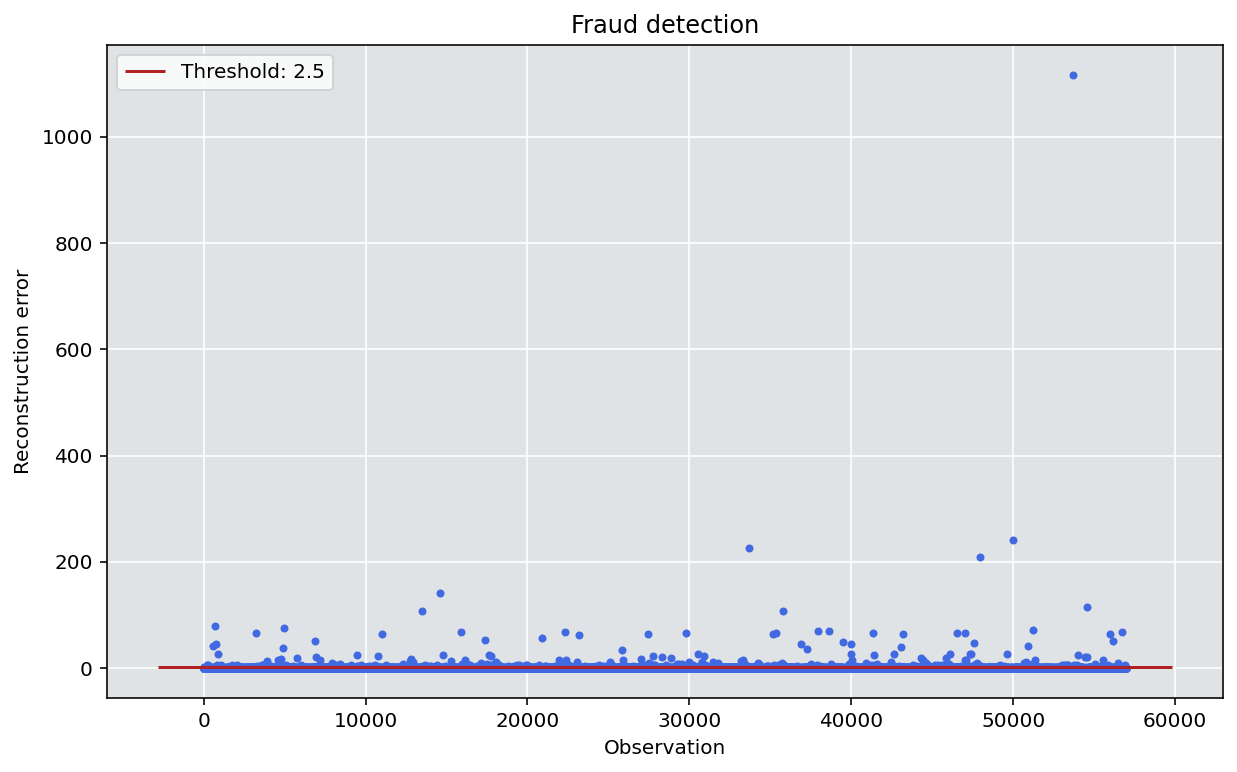

In [ ]:
#Prediction
plt.figure(figsize = (10, 6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(re_error[:,1], marker = 'o', ms = 3, c = 'royalblue', linestyle = 'None')
ax.hlines(thres, ax.get_xlim()[0], ax.get_xlim()[1], colors = 'firebrick', zorder = 100, label = f'Threshold: {thres}')
ax.legend()
plt.title("Fraud detection")
plt.ylabel('Reconstruction error')
plt.xlabel('Observation')